In [457]:
# Importing Libraries
import pandas as pd
from pandas import Timestamp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.gridspec as gridspec 
%matplotlib inline
from ggplot import *

In [378]:
############working directory#################
os.chdir("E:\python learning")

In [479]:
# Loading data
absnt = pd.read_excel("Absenteeism_at_work_Project.xls")

# Exploratory Data Analysis

In [380]:
# First 5 rows of data
absnt.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [381]:
# Data Types of all the variables
absnt.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [382]:
# Number of Unique values present in each variable
absnt.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [383]:
df.shape

(740, 131)

In [384]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']


In [385]:
absnt['ID']= absnt['ID'].astype('category')
absnt['Reason for absence']= absnt['Reason for absence'].astype('category')
absnt['Month of absence']= absnt['Month of absence'].astype('category')
absnt['Day of the week']= absnt['Day of the week'].astype('category')
absnt['Seasons']= absnt['Seasons'].astype('category')
absnt['Disciplinary failure']= absnt['Disciplinary failure'].astype('category')
absnt['Education']= absnt['Education'].astype('category')
absnt['Social drinker']= absnt['Social drinker'].astype('category')
absnt['Social smoker']= absnt['Social smoker'].astype('category')
absnt['Pet']= absnt['Pet'].astype('category')
absnt['Son']= absnt['Son'].astype('category')

# Missing Value Analysis

In [386]:
#Creating dataframe with missing values present in each variable
missing_val = pd.DataFrame(absnt.isnull().sum()).reset_index()

#Renaming variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(absnt))*100

# Sorting missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)


## Imputation methods

In [387]:
absnt['Body mass index'].iloc[12]

23.0

In [388]:
# Checking for "Body mass index" column
# Actual value = 23
# Mean = 26.68
# Median = 25
# KNN = 23


#create missing value
df['Body mass index'].iloc[12] = np.nan

In [389]:
# # Impute with mean
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].mean())
# df['Body mass index'].iloc[12]

# Impute with median
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].median())
# df['Body mass index'].iloc[12]

In [480]:
#Apply KNN imputation algorithm
absnt = pd.DataFrame(KNN(k = 5).complete(absnt), columns = absnt.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.168
Imputing row 101/740 with 1 missing, elapsed time: 0.170
Imputing row 201/740 with 0 missing, elapsed time: 0.171
Imputing row 301/740 with 0 missing, elapsed time: 0.172
Imputing row 401/740 with 0 missing, elapsed time: 0.173
Imputing row 501/740 with 0 missing, elapsed time: 0.173
Imputing row 601/740 with 0 missing, elapsed time: 0.174
Imputing row 701/740 with 0 missing, elapsed time: 0.175


In [391]:
absnt['Body mass index'].iloc[12]

23.0

In [392]:
# Checking if all the missing value imputed
absnt.isnull().sum().sum()

0

# OutLier Analysis

Text(0,0.5,'Values')

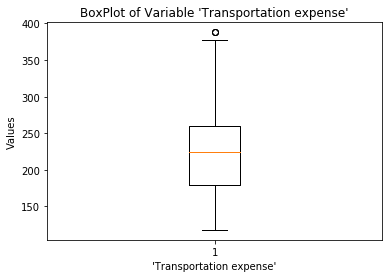

In [393]:
# Ploting BoxPlot of continuous variables
plt.boxplot(absnt['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')

Text(0,0.5,'Values')

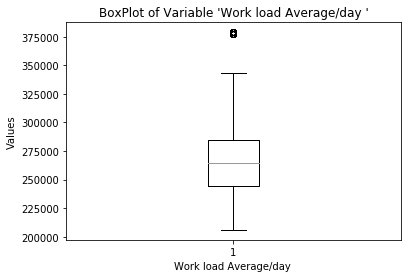

In [394]:
plt.boxplot(absnt['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0,0.5,'Values')

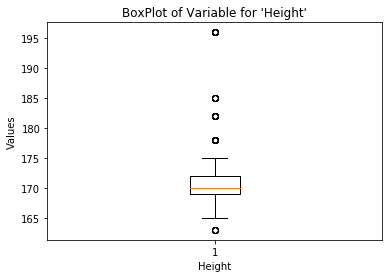

In [395]:
plt.boxplot(absnt['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

Text(0,0.5,'Values')

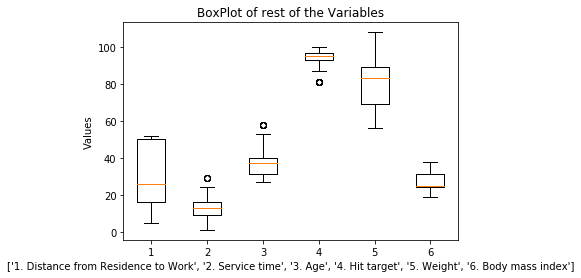

In [396]:
plt.boxplot([ absnt['Distance from Residence to Work'], absnt['Service time'], absnt['Age'], absnt['Hit target'], absnt['Weight'], absnt['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [397]:
# From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
# there is no outlier

In [481]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuou variables to detect and remove Outliers
for i in continuous_vars:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(absnt[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    absnt.loc[absnt[i]< minimum,i] = np.nan
    absnt.loc[absnt[i]> maximum,i] = np.nan


# Imputing missing values with KNN
absnt = pd.DataFrame(KNN(k = 5).complete(absnt), columns = absnt.columns)
# Checking if there is any missing value
absnt.isnull().sum().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.132
Imputing row 101/740 with 1 missing, elapsed time: 0.132
Imputing row 201/740 with 0 missing, elapsed time: 0.132
Imputing row 301/740 with 0 missing, elapsed time: 0.132
Imputing row 401/740 with 0 missing, elapsed time: 0.132
Imputing row 501/740 with 0 missing, elapsed time: 0.132
Imputing row 601/740 with 0 missing, elapsed time: 0.132
Imputing row 701/740 with 0 missing, elapsed time: 0.132


0

# Feature Selection

In [399]:
##Correlation analysis for continuous variables
#Correlation plot
absnt_corr = absnt.loc[:,continuous_vars]

[]

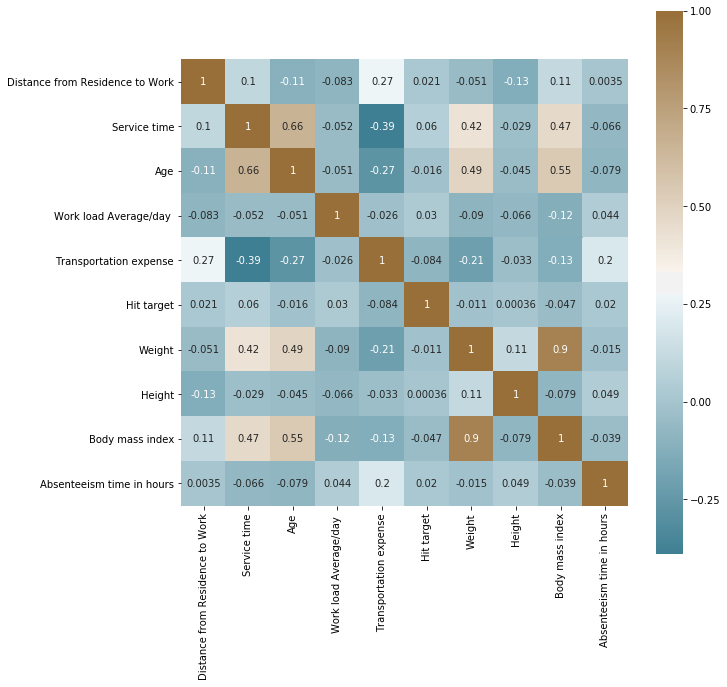

In [400]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = absnt_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [482]:
# Droping the variables which has redundant information
to_drop = ['Weight']
absnt = absnt.drop(to_drop, axis = 1)

In [483]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

In [484]:
clean_data = absnt.copy()

# Feature Scaling

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


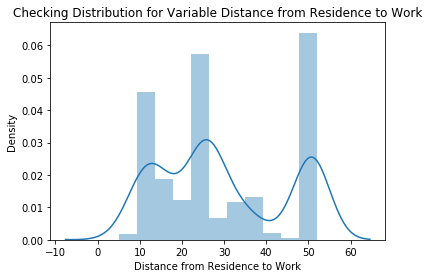

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


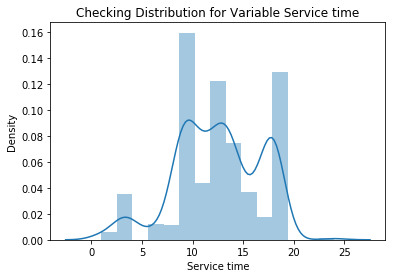

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


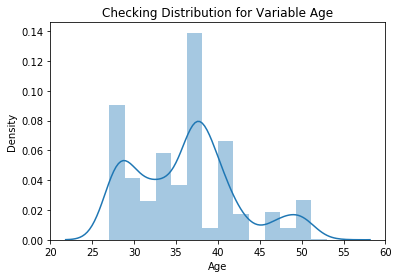

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


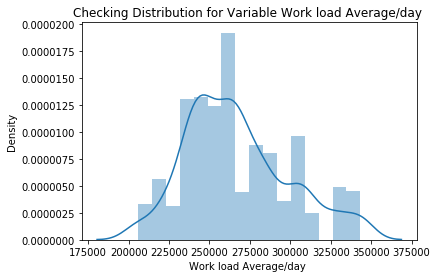

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


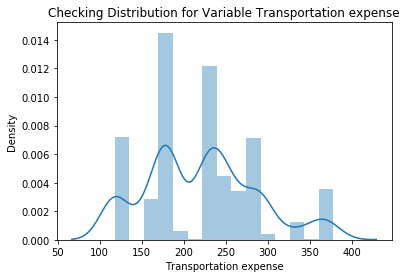

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


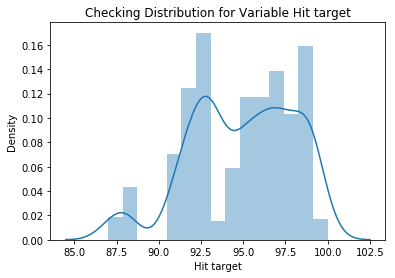

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


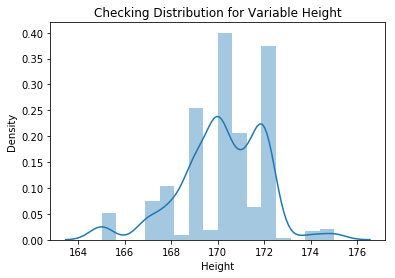

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


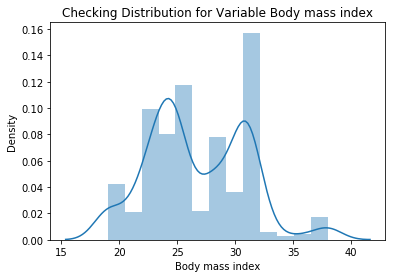

In [404]:
# Checking if there is any normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(absnt[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [405]:
# Since there is no normally distributed curve we will use Normalizationg for Feature Scalling
# #Normalization
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    absnt[i] = (absnt[i] - absnt[i].min())/(absnt[i].max()-absnt[i].min())

   # Machine Learning Models

In [406]:
absnt1 = absnt.copy()
# Get dummy variables for categorical variables
absnt = pd.get_dummies(data = absnt, columns = categorical_vars)
fields_to_drop = ['Absenteeism time in hours']
absnt = absnt.drop(fields_to_drop, axis=1)
absnt=absnt.join(absnt1['Absenteeism time in hours'])




In [407]:
# Copying dataframe
absntc = absnt.copy()

In [408]:
absnt.head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1.0,ID_2.0,...,Pet_8.0,Son_0.0,Son_1.0,Son_1.0000000034808583,Son_1.8450918338649727,Son_2.0,Son_3.0,Son_3.9575535615568516,Son_4.0,Absenteeism time in hours
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,0,0,...,0,0,0,0,0,1,0,0,0,4.0


In [409]:
train, test = train_test_split(absnt, test_size=0.2)

## Random Forest

In [410]:

# Building model on top of training dataset
RFmodel = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:131], train.iloc[:,131])

# Calculating RMSE for training data to check for over fitting
RF_Predictions_tr = RFmodel.predict(train.iloc[:,0:131])
rmse_for_train = np.sqrt(mean_squared_error( train.iloc[:,131],RF_Predictions_tr))

# Calculating RMSE for test data to check accuracy
RF_Predictions_ts = RFmodel.predict(test.iloc[:,0:131])
rmse_for_train = np.sqrt(mean_squared_error( test.iloc[:,131],RF_Predictions_ts))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Training data = 2.4691408765747926
Root Mean Squared Error For Test data = 2.8202126687253597


## Linear Regression

In [411]:

# Building model on top of training dataset
model = sm.OLS(train.iloc[:,131], train.iloc[:,0:131]).fit()

# Calculating RMSE for training data to check for over fitting
pred_train = model.predict(train.iloc[:,0:131])
rmse_for_train = np.sqrt(mean_squared_error( train.iloc[:,131],pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = model.predict(test.iloc[:,0:131])
rmse_for_test =np.sqrt(mean_squared_error( test.iloc[:,131],pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))


Root Mean Squared Error For Training data = 2.3991368469613867
Root Mean Squared Error For Test data = 3459290.1556421528


# Dimensionality Reduction using PCA

In [412]:
target = absnt['Absenteeism time in hours']

In [413]:
absnt.drop(['Absenteeism time in hours'], inplace = True, axis=1)
absnt.shape

(740, 131)

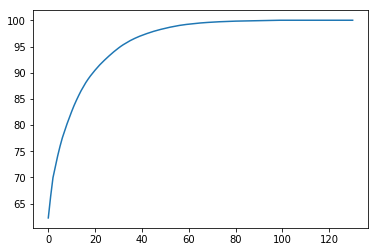

In [422]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = absntc.values

# Data has 131 variables so no of components of PCA = 131
pca = PCA(n_components=131)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [443]:
# From the above plot selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

## Random Forest

In [444]:


# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Training data = 0.04444065607927057
Root Mean Squared Error For Test data = 0.13010217103417956


## Linear Regression

In [445]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Training data = 1.9988146536544287e-15
Root Mean Squared Error For Test data = 3.4261115757546174e-09


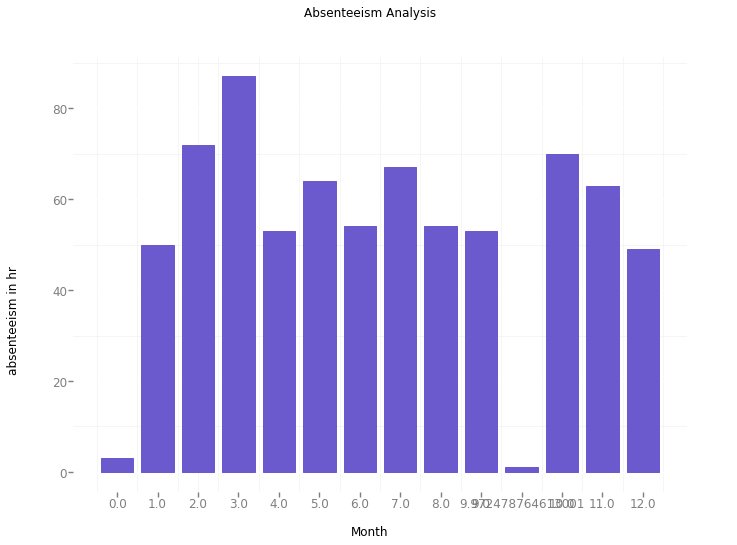

<ggplot: (-9223371948368252472)>

In [485]:
#Visualising Important component

ggplot(clean_data, aes(x='Month of absence', y='Absenteeism time in hours')) +\
    geom_bar(fill= "SlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Month") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

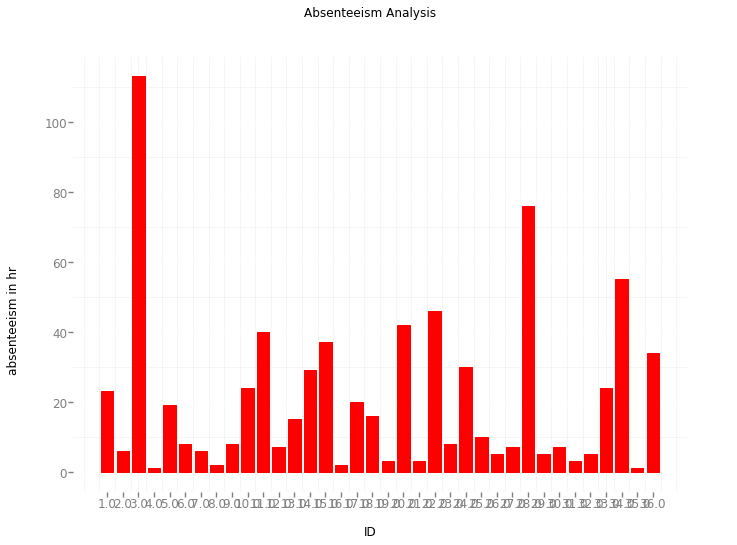

<ggplot: (88486523242)>

In [486]:
ggplot(clean_data, aes(x='ID', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Red") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("ID") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

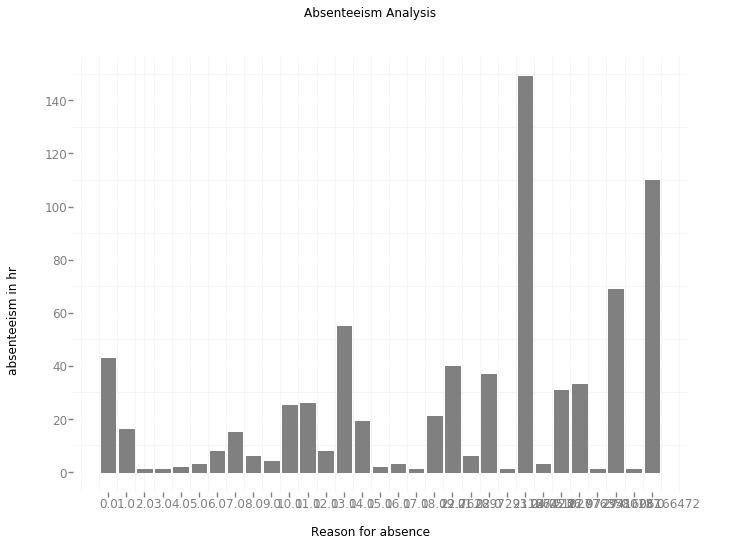

<ggplot: (-9223371948367326285)>

In [487]:
ggplot(clean_data, aes(x='Reason for absence', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Grey") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Reason for absence") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

In [471]:
clean_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')